In [ ]:


import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from collections import Counter

In [ ]:
y_2018 = pd.read_csv("../input/world-happiness/2018.csv")
y_2019 = pd.read_csv("../input/world-happiness/2019.csv")

data = pd.concat([y_2018,y_2019], sort = False)
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,312.0,78.500000,45.104737,1.000,39.75000,78.5000,117.25000,156.000
Score,312.0,5.391506,1.114631,2.853,4.51425,5.3795,6.17600,7.769
GDP per capita,312.0,0.898298,0.394592,0.000,0.60950,0.9600,1.21950,2.096
Social support,312.0,1.211026,0.300310,0.000,1.05575,1.2655,1.45750,1.644
Healthy life expectancy,312.0,0.661295,0.252724,0.000,0.48825,0.6990,0.85800,1.141
Freedom to make life choices,312.0,0.423538,0.156024,0.000,0.32250,0.4495,0.54025,0.724
Generosity,312.0,0.182926,0.096739,0.000,0.10875,0.1755,0.24500,0.598
Perceptions of corruption,311.0,0.111299,0.095365,0.000,0.05000,0.0820,0.14050,0.457


In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 24.4+ KB


In [ ]:
data.rename(columns={
    "Overall rank": "rank",
    "Country or region": "country",
    "Score": "score",
    "GDP per capita": "gdp",
    "Social support": "social",
    "Healthy life expectancy": "healthy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption"
},inplace = True)
del data["rank"]

In [ ]:
data.columns[data.isnull().any()]

Index(['corruption'], dtype='object')

In [ ]:
data.isnull().sum()

country       0
score         0
gdp           0
social        0
healthy       0
freedom       0
generosity    0
corruption    1
dtype: int64

In [ ]:
data[data["corruption"].isnull()]

,country,score,gdp,social,healthy,freedom,generosity,corruption
19,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [ ]:
avg_data_corruption = data[data["score"] > 6.774].mean().corruption
data.loc[data["corruption"].isnull(),["corruption"]] = avg_data_corruption
data[data["corruption"].isnull()]

,country,score,gdp,social,healthy,freedom,generosity,corruption


In [ ]:
df = data.copy()
df = df.select_dtypes(include=["float64","int64"])
df.head()

,score,gdp,social,healthy,freedom,generosity,corruption
0,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]

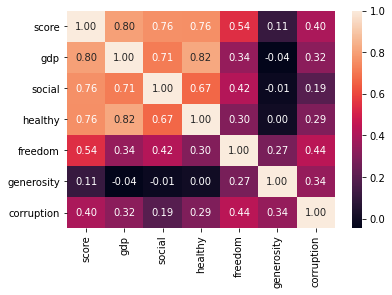

In [ ]:
column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]
sns.heatmap(df[column_list].corr(), annot = True, fmt = ".2f") #annot=True dersek minik karelerin içinde coorelation skorlarını da görmüş oluruz (daha kolay anlayabilmek için)
plt.show()

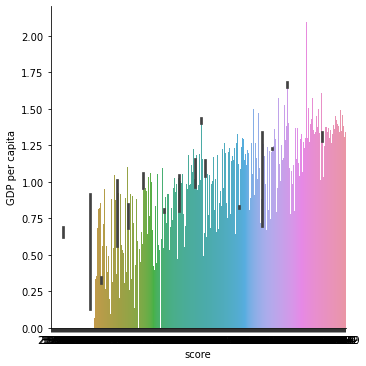

In [ ]:
g = sns.factorplot(x = "score", y = "gdp", data = df, kind = "bar", size = 5)
g.set_ylabels("GDP per capita")
plt.show()

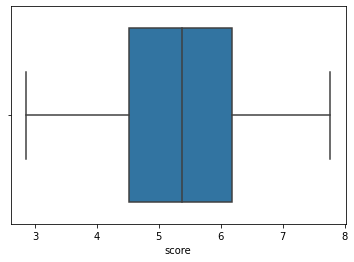

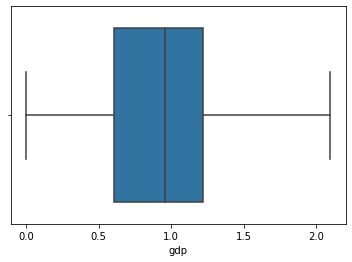

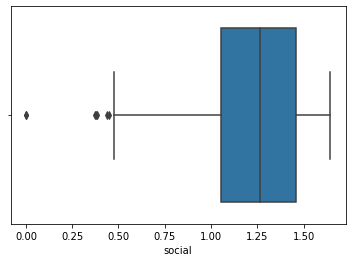

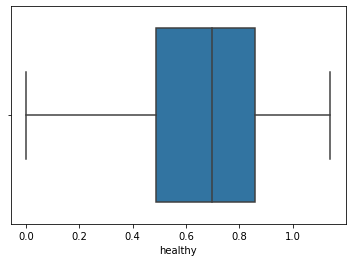

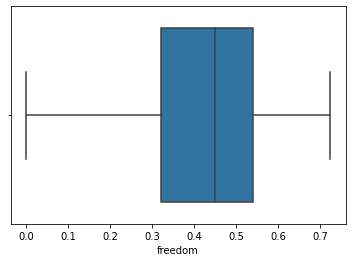

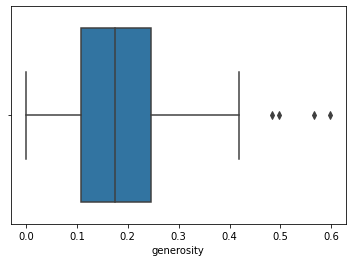

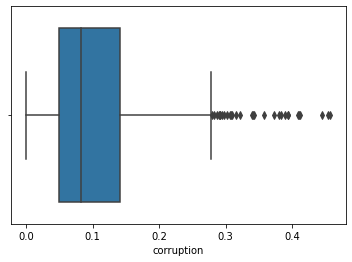

In [ ]:
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is" + str(lower_bound))
print("upper bound is" + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound isscore         2.021625
gdp          -0.305500
social        0.453125
healthy      -0.066375
freedom      -0.004125
generosity   -0.095625
corruption   -0.086875
dtype: float64
upper bound isscore         8.668625
gdp           2.134500
social        2.060125
healthy       1.412625
freedom       0.866875
generosity    0.449375
corruption    0.278125
dtype: float64
Q1:  score         4.51425
gdp           0.60950
social        1.05575
healthy       0.48825
freedom       0.32250
generosity    0.10875
corruption    0.05000
Name: 0.25, dtype: float64
Q3:  score         6.17600
gdp           1.21950
social        1.45750
healthy       0.85800
freedom       0.54025
generosity    0.24500
corruption    0.14125
Name: 0.75, dtype: float64


In [ ]:
df.loc[detect_outliers(df,["score","gdp","social","healthy","freedom","generosity","corruption"])]

,score,gdp,social,healthy,freedom,generosity,corruption


In [ ]:
# for corruption
df_table = df["corruption"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -0.08687499999999997
upper bound is 0.27812499999999996
Q1:  0.05
Q3:  0.14125


In [ ]:
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector

0       True
1       True
2       True
3      False
4       True
       ...  
151     True
152    False
153    False
154    False
155    False
Name: corruption, Length: 312, dtype: bool

In [ ]:
outliers_vector = df_table[outliers_vector]
outliers_vector.index.values

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  13,  14,  16,  33,
        75,  97, 150,   0,   1,   2,   4,   5,   6,   7,   8,  10,  13,
        15,  33,  75, 151])

In [ ]:
df_table = data.copy()
df_table["corruption"].iloc[outliers_vector.index.values] = df_table["corruption"].mean()
df_table["corruption"].iloc[outliers_vector.index.values]


0      0.111794
1      0.111794
2      0.111794
4      0.111794
5      0.111794
6      0.111794
7      0.111794
8      0.111794
9      0.111794
13     0.111794
14     0.111794
16     0.111794
33     0.111794
75     0.111794
97     0.111794
150    0.111794
0      0.111794
1      0.111794
2      0.111794
4      0.111794
5      0.111794
6      0.111794
7      0.111794
8      0.111794
10     0.111794
13     0.111794
15     0.111794
33     0.111794
75     0.111794
151    0.111794
Name: corruption, dtype: float64

In [ ]:
data = df_table

# Simple Linear Regression

### score -- gdp

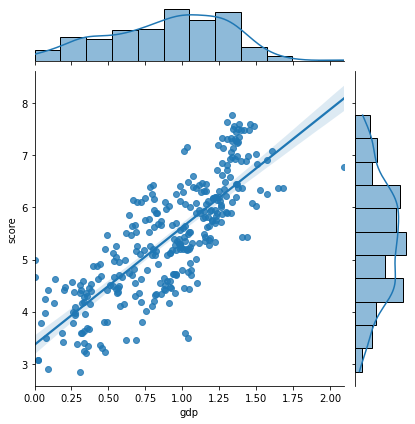

In [ ]:
sns.jointplot(x = "gdp", y = "score", data = df_table, kind = "reg")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X = data[["gdp"]]
X.head

<bound method NDFrame.head of        gdp
0    1.305
1    1.456
2    1.351
3    1.343
4    1.420
..     ...
151  0.359
152  0.476
153  0.350
154  0.026
155  0.306

[312 rows x 1 columns]>

In [ ]:
y = data[["score"]]
y.head

<bound method NDFrame.head of      score
0    7.632
1    7.594
2    7.555
3    7.495
4    7.487
..     ...
151  3.334
152  3.231
153  3.203
154  3.083
155  2.853

[312 rows x 1 columns]>

In [ ]:
reg = LinearRegression()
model = reg.fit(X,y)
print("intercept: ", model.intercept_)
print("coef: ", model.coef_)
print("rcore. ", model.score(X,y))

intercept:  [3.36665334]
coef:  [[2.25409931]]
rcore.  0.6367680251195654


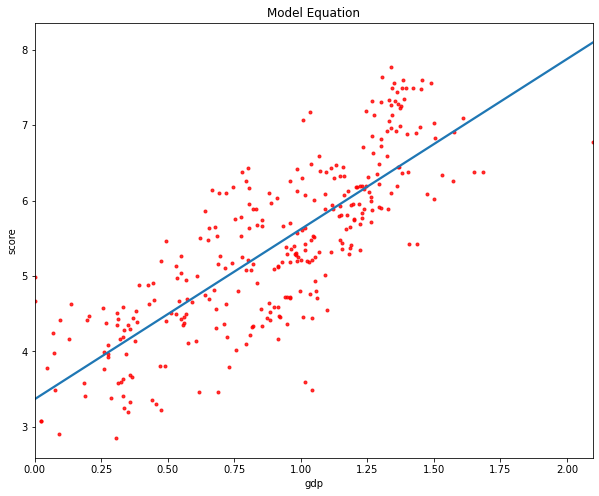

In [ ]:
# prediction
plt.figure(figsize = (10,8))
g = sns.regplot(x = data["gdp"], y = data["score"], ci = None, scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_xlabel("gdp")
g.set_ylabel("score")
plt.show()

* If gdp score is 1.50 , happines score is 6.74

In [ ]:
model.predict([[1.50]])

array([[6.7478023]])

In [ ]:
gdb_list = [[0.25],[0.50],[0.75],[1.00],[1.25],[1.50]]
model.predict(gdb_list)
for g in gdb_list:
    print("The happiness value of the country with a gdp value of ",g,": ",model.predict([g]))

The happiness value of the country with a gdp value of  [0.25] :  [[3.93017816]]
The happiness value of the country with a gdp value of  [0.5] :  [[4.49370299]]
The happiness value of the country with a gdp value of  [0.75] :  [[5.05722782]]
The happiness value of the country with a gdp value of  [1.0] :  [[5.62075264]]
The happiness value of the country with a gdp value of  [1.25] :  [[6.18427747]]
The happiness value of the country with a gdp value of  [1.5] :  [[6.7478023]]


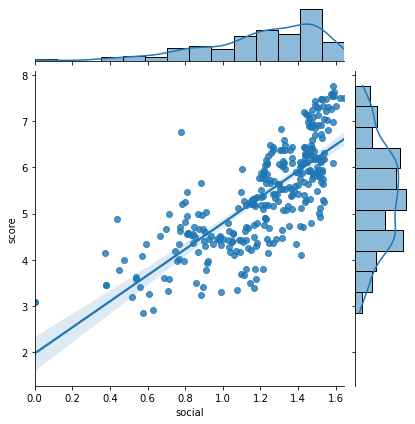

In [ ]:
sns.jointplot(x = "social", y = "score", data = df_table, kind = "reg")
plt.show()

* Let's create a class and make the job easier.

In [ ]:
def linear_reg(col,text,prdctn):
    
    sns.jointplot(x=col,y="score",data=df_table,kind="reg")
    plt.show()
    
    X = data[[col]]
    y = data[["score"]]
    reg = LinearRegression()
    model = reg.fit(X,y)
    
    # prediction
    plt.figure(figsize=(12,6))
    g = sns.regplot(x=data[col],y=data["score"],ci=None,scatter_kws = {'color':'r','s':9})
    g.set_title("Model Equation")
    g.set_ylabel("score")
    g.set_xlabel(col)
    plt.show()
    
    print(text,": ", model.predict([[prdctn]]))

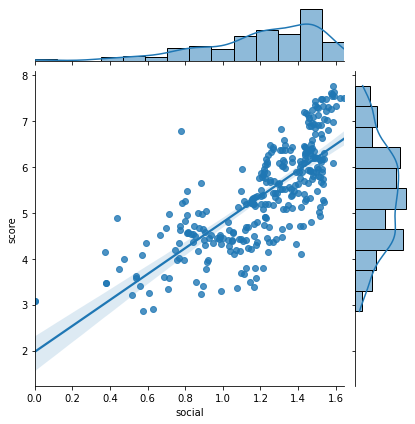

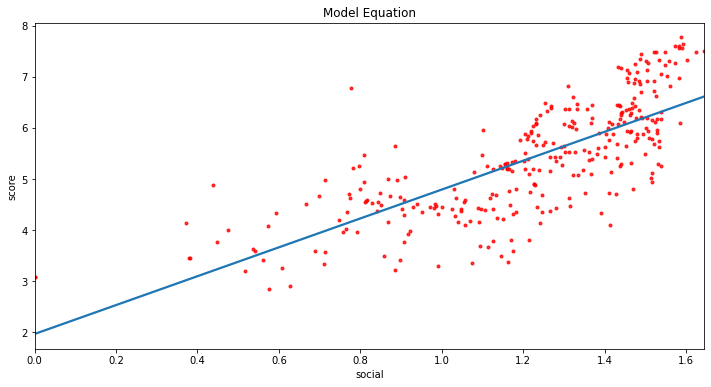

The happiness value of the country whose sociability value is 2: :  [[7.62022176]]


In [ ]:
linear_reg("social","The happiness value of the country whose sociability value is 2:",2)

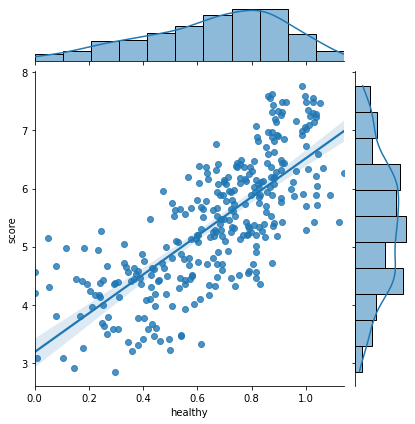

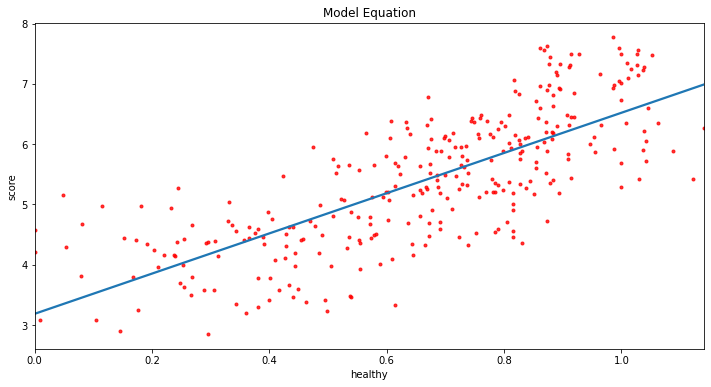

The happiness value of the country whose healthiest value is 1.20: :  [[7.18742031]]


In [ ]:
linear_reg("healthy","The happiness value of the country whose healthiest value is 1.20:",1.20)

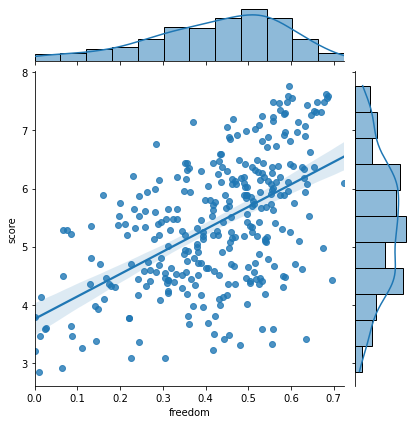

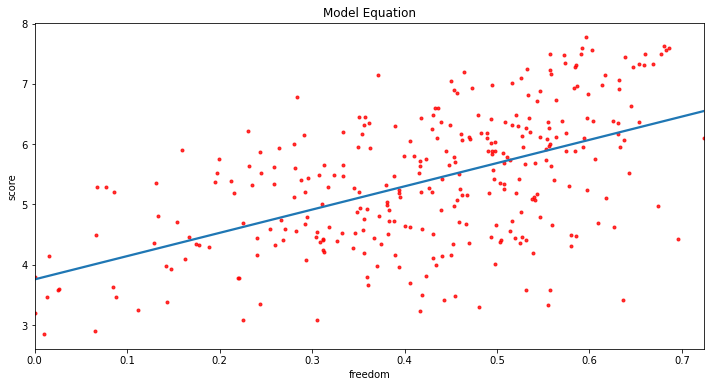

The happiness value of the country whose freedom value is 1.20: :  [[8.38632929]]


In [ ]:
linear_reg("freedom","The happiness value of the country whose freedom value is 1.20:",1.20)

In [ ]:
import statsmodels.api as sms

X = df.drop("score", axis = 1)
y = df["score"]

# OLS (dependent,independent)
lm = sms.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3622.
Date:                Tue, 11 May 2021   Prob (F-statistic):                   7.57e-281
Time:                        15:03:19   Log-Likelihood:                         -307.69
No. Observations:                 312   AIC:                                      627.4
Df Residuals:                     306   BIC:                                      649.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gdp            0.5774      0.178      3.238      0.001       0.226       0.928
social         2.2624      0.153     14.780      0.000       1.961       2.564
healthy        1.2506      0.260      4.805      0.000       0.738       1.763
freedom        1.8640      0.289      6.447      0.000       1.295       2.433
generosity     2.0380      0.399      5.109      0.000       1.253       2.823
corruption     0.5464      0.468      1.169      0.243      -0.374       1.466
==============================================================================
Omnibus:                        6.324   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                7.204
Skew:                           0.212   Prob(JB):                       0.0273
Kurtosis:                       3.612   Cond. No.                         24.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R-squared   :   Percentages of independent variables that explain the change in dependent variables.
* F-statistic :   Expresses the significance of the model.
* Coef        :   Refers to coefficients.
* Std Err     :   Standard errors.

In [ ]:
lm = LinearRegression()
model = lm.fit(X,y)
print("constant: ", model.intercept_)
print("coefficient: ", model.coef_)

constant:  1.8541077926951246
coefficient:  [0.929921   1.06504217 0.94321492 1.40426054 0.52070628 0.88114008]


In [ ]:
# PREDICTION
# Score = 0.929921*gdp + 1.06504217*social + 0.94321492*healthy + 1.40426054*freedom + 0.52070628*generosity + 0.88114008*corruption

new_data = [[1],[2],[1.25],[1.75],[1.50],[0.75]]
new_data = pd.DataFrame(new_data).T
new_data

,0,1,2,3,4,5
0,1.0,2.0,1.25,1.75,1.5,0.75


In [ ]:
model.predict(new_data)

array([9.99250222])

In [ ]:
# calculating the amount of error

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y,model.predict(X))
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  0.267683073163503
RMSE:  0.5173809748758674


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("score", axis = 1)
y = df["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,gdp,social,healthy,freedom,generosity,corruption
111,0.916,0.817,0.790,0.419,0.149,0.032
52,1.187,1.465,0.812,0.264,0.075,0.064
145,1.017,1.174,0.417,0.557,0.042,0.092
47,1.162,1.232,0.825,0.462,0.083,0.005
78,1.154,1.202,0.879,0.131,0.000,0.044


In [ ]:
X_test.head()

,gdp,social,healthy,freedom,generosity,corruption
72,1.051,1.361,0.871,0.197,0.142,0.080
9,1.340,1.573,0.910,0.647,0.361,0.302
57,1.229,1.211,0.909,0.495,0.179,0.154
60,1.229,1.191,0.909,0.423,0.202,0.035
25,1.365,1.436,0.857,0.418,0.151,0.078


In [ ]:
y_train.head()

111    4.586
52     5.940
145    3.590
47     6.070
78     5.358
Name: score, dtype: float64

In [ ]:
y_test.head()

72    5.523
9     7.272
57    5.835
60    5.762
25    6.441
Name: score, dtype: float64

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Training error: ", np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("Test Error: ", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

Training error:  0.5286863282545514
Test Error:  0.4700442336475783


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

array([-0.38049606, -0.23987782, -0.24029   , -0.41370114, -0.16258143,
       -0.37149593, -0.25642041, -0.39761278, -0.21403289, -0.29719585])

In [ ]:
cvs_avg_mse = np.mean(-cross_val_score(model, X_train, y_train, cv = 20, scoring = "neg_mean_squared_error"))
cvs_avg_rmse = np.sqrt(cvs_avg_mse)

print("Cross Val Score MSE : ",cvs_avg_mse)
print("Cross Val Score RMSE : ",cvs_avg_rmse)

Cross Val Score MSE :  0.2945486894707848
Cross Val Score RMSE :  0.5427234005188875


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [ ]:
X = df.drop("score", axis = 1)
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [ ]:
ridge_model.coef_

array([0.94225637, 1.02043421, 0.93689001, 1.44712035, 0.35979844,
       0.97107389])

In [ ]:
ridge_model.intercept_

1.9108156265652148

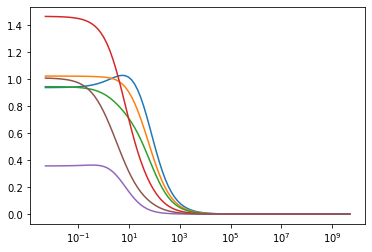

In [ ]:
lambdas = 10**np.linspace(10,-2,100)*0.5 # Creates random numbers
ridge_model =  Ridge()
coefs = []

for i in lambdas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    coefs.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale("log")

In [ ]:
ridge_model = Ridge(10).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5102254754869215

In [ ]:
ridge_model = Ridge(30).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5983602488673112

In [ ]:
ridge_model = Ridge(90).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.7710248515673939

In [ ]:
lambdas1 = 10**np.linspace(10,-2,100)
lambdas2 = np.random.randint(0,1000,100)

ridgeCV = RidgeCV(alphas = lambdas1,scoring = "neg_mean_squared_error", cv=10, normalize=True)
ridgeCV.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [ ]:
ridgeCV.alpha_

0.0932603346883218

In [ ]:
# final model
ridge_tuned = Ridge(alpha = ridgeCV.alpha_).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.4739437357393685

In [ ]:
# for lambdas2
ridgeCV = RidgeCV(alphas = lambdas2, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgeCV.fit(X_train, y_train)
ridge_tuned = Ridge(alpha = ridgeCV.alpha_).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.4826483937233663

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:
x = df.drop("score", axis = 1)
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
lasso_model = Lasso().fit(X_train, y_train)

In [ ]:
print("intercept: ", lasso_model.intercept_)
print("coef: ", lasso_model.coef_)

intercept:  5.346196172248804
coef:  [0. 0. 0. 0. 0. 0.]


In [ ]:
# coefficients for different lambda values

alphas = np.random.randint(0,10000,10)
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

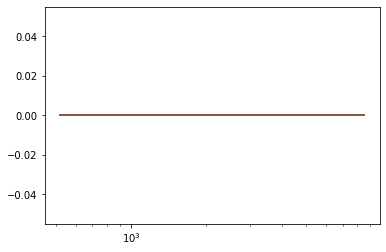

In [ ]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [ ]:
lasso_model

Lasso()

In [ ]:
lasso_model.predict(X_train)[0:5]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [ ]:
lasso_model.predict(X_test)[0:5]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [ ]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.1087763155347463

In [ ]:
r2_score(y_test,y_pred)

-0.015561293164185974

In [ ]:
lasso_cv_model = LassoCV(cv = 10, max_iter = 100000).fit(X_train, y_train)
lasso_cv_model

LassoCV(cv=10, max_iter=100000)

In [ ]:
lasso_cv_model.alpha_

0.0026847466799991312

In [ ]:
lasso_tuned = Lasso().set_params(alpha= lasso_cv_model.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5394427335399019